# Data analysis

In [66]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import seaborn
import matplotlib.pyplot as plt

In [57]:
df1 = pd.read_csv('apps_descriptions1.csv').set_index('appId')
df_bot = pd.read_csv('apps_description_bots.csv').set_index('appId')
df2 = pd.read_csv('apps_descriptions2.csv').set_index('appId')

In [67]:
#cleaning descriptions from html tags
df1['description'] = df1['description'].apply(lambda raw_html: BeautifulSoup(raw_html, "lxml").text)
df2['description'] = df2['description'].apply(lambda raw_html: BeautifulSoup(raw_html, "lxml").text)

C:\Users\ppaul\AppData\Local\Temp\ipykernel_20936\1078841978.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df2['description'] = df2['description'].apply(lambda raw_html: BeautifulSoup(raw_html, "lxml").text)


In [58]:
df1['installs'] = df1['installs'].apply(lambda x: int(re.sub("[^0-9]", "", x)))
df_bot.rename(columns={'Unnamed: 3':'category'}, inplace=True)

In [59]:
filtered_bots = df_bot[df_bot['category'].apply(lambda x: True if 'therapeutic chatbot' in x or 'therapy chatbot' in x else False)]

In [68]:
chatbot_df = df2[df2.category.apply(lambda x: True if x in ['therapy chatbot', 'chatbot therapy', 'Therapy chatbot', 'Therapy chatbot, self-care', 'companion chatbot, chatbot therapy','therapy chatbot, but self-care mostly'] else False)]
chatbot_df = pd.concat([chatbot_df,df1.loc[filtered_bots.index]]).drop_duplicates()

In [64]:
print('Number of therapeutical chatbots found:',len(chatbot_df))

Number of therapeutical chatbots found: 28


Histogram of rounded down number of therapeutical chatbots' installations

<Axes: xlabel='installs'>

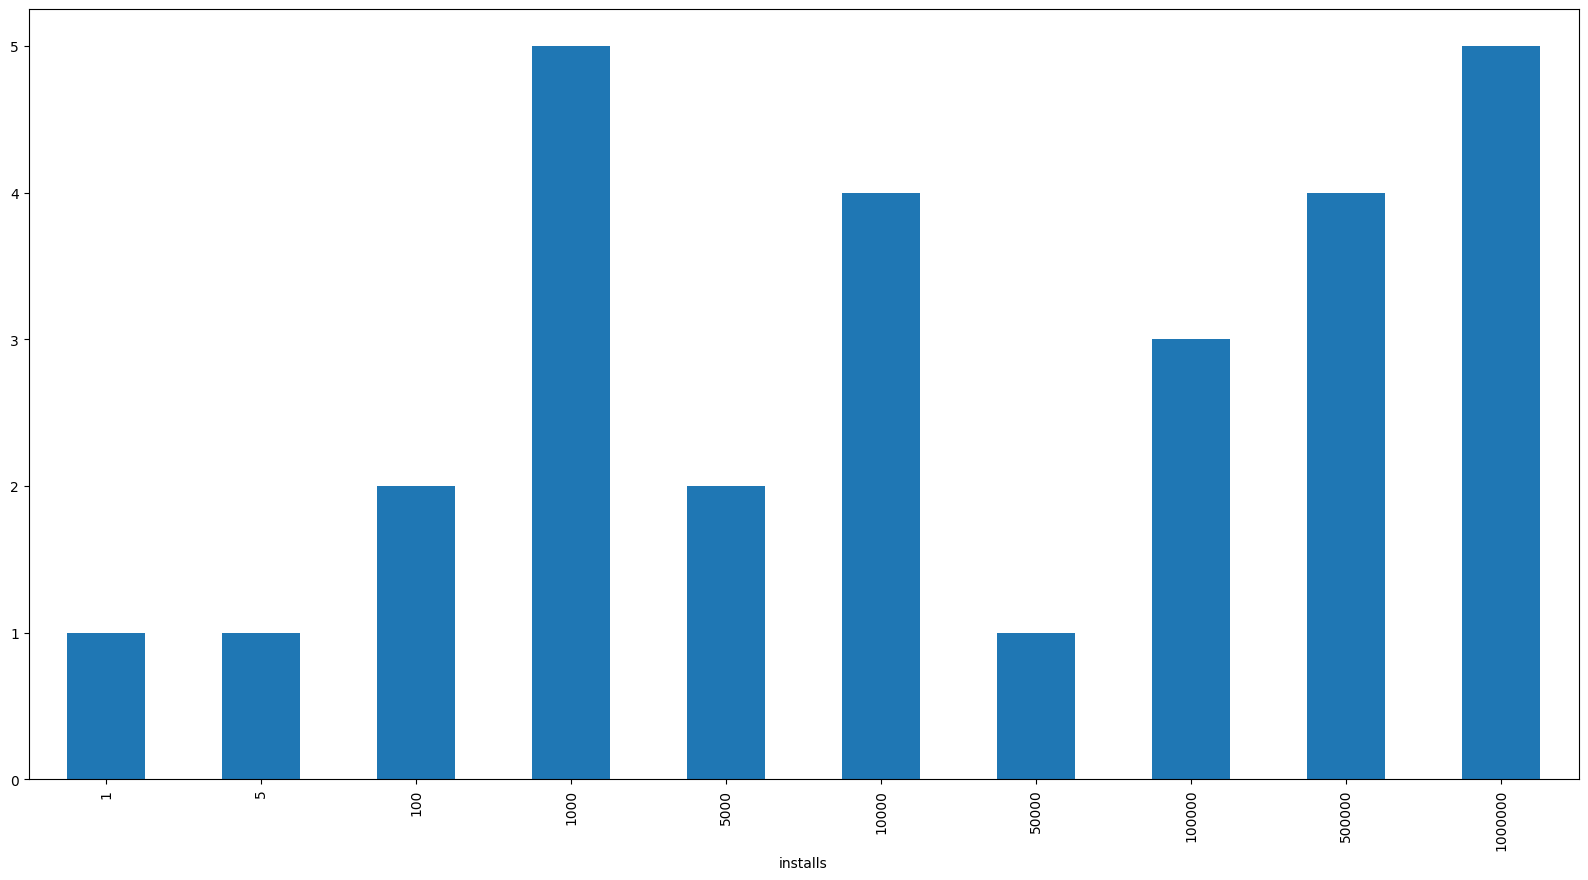

In [62]:
chatbot_df['installs'].value_counts().sort_index().plot(kind='bar',figsize=(20,10))

The 10 most downloaded therapeutical chatbots:

In [65]:
chatbot_df.sort_values(by='installs',ascending=False).head(10)


,appId.1,icon,screenshots,title,score,genre,price,free,currency,video,videoImage,category,description,descriptionHTML,developer,installs,keyword,Unnamed: 0.1,Unnamed: 0
appId,,,,,,,,,,,,,,,,,,,
br.com.youper,br.com.youper,https://play-lh.googleusercontent.com/_0v_dDm_...,['https://play-lh.googleusercontent.com/LcfrTD...,Youper - CBT Therapy Chatbot,4.083288,Health & Fitness,0.0,True,USD,NaN,NaN,Therapy chatbot,Youper guides you through interactive CBT Ther...,Youper guides you through interactive CBT Ther...,"Youper, Inc",1000000,['conversational agent depression'],NaN,NaN
br.com.youper,NaN,https://play-lh.googleusercontent.com/_0v_dDm_...,['https://play-lh.googleusercontent.com/4cfbPL...,Youper - CBT Therapy,4.096950,Health & Fitness,0.0,True,USD,NaN,NaN,NaN,Youper guides you through interactive CBT Ther...,Youper guides you through interactive CBT Ther...,"Youper, Inc",1000000,NaN,8.0,8.0
bot.touchkin,NaN,https://play-lh.googleusercontent.com/_2t27Nwv...,['https://play-lh.googleusercontent.com/9adhJ-...,"Wysa: Anxiety, therapy chatbot",4.710611,Health & Fitness,0.0,True,USD,https://www.youtube.com/embed/diOVSgJdH9k?ps=p...,https://i.ytimg.com/vi/diOVSgJdH9k/hqdefault.jpg,NaN,"Imagine a mood tracker, mindfulness coach, anx...","Imagine a mood tracker, mindfulness coach, anx...",Touchkin,1000000,NaN,0.0,0.0
com.ifriend.app,com.ifriend.app,https://play-lh.googleusercontent.com/9XWzyMbF...,['https://play-lh.googleusercontent.com/m0M1Cl...,EVA AI (ex Journey) Chat Bot,4.170275,Role Playing,0.0,True,USD,NaN,NaN,"companion chatbot, chatbot therapy","Hey there, I'm Eva, your AI soulmate, not a re...","Hey there, I&#39;m Eva, your AI soulmate, not ...",Novi Limited,1000000,['conversational agent panic'],NaN,NaN
bot.touchkin,bot.touchkin,https://play-lh.googleusercontent.com/_2t27Nwv...,['https://play-lh.googleusercontent.com/9adhJ-...,"Wysa: Anxiety, therapy chatbot",4.693801,Health & Fitness,0.0,True,USD,https://www.youtube.com/embed/diOVSgJdH9k?ps=p...,https://i.ytimg.com/vi/diOVSgJdH9k/hqdefault.jpg,therapy chatbot,"Imagine a mood tracker, mindfulness coach, anx...","Imagine a mood tracker, mindfulness coach, anx...",Touchkin,1000000,['conversational agent depression'],NaN,NaN
com.woebot,com.woebot,https://play-lh.googleusercontent.com/a3y33ApE...,['https://play-lh.googleusercontent.com/IEOGw8...,Woebot: Your Self-Care Expert,4.338235,Medical,0.0,True,USD,https://www.youtube.com/embed/KGh8dNkpZWk?ps=p...,https://i.ytimg.com/vi/KGh8dNkpZWk/hqdefault.jpg,therapy chatbot,WINNER OF THE 2019 GOOGLE PLAY AWARD FOR STAND...,WINNER OF THE 2019 GOOGLE PLAY AWARD FOR STAND...,Woebot Health Inc,500000,['conversational agent mental illness'],NaN,NaN
com.woebot,NaN,https://play-lh.googleusercontent.com/a3y33ApE...,['https://play-lh.googleusercontent.com/IEOGw8...,Woebot: Your Self-Care Expert,4.375622,Medical,0.0,True,USD,https://www.youtube.com/embed/KGh8dNkpZWk?ps=p...,https://i.ytimg.com/vi/KGh8dNkpZWk/hqdefault.jpg,NaN,WINNER OF THE 2019 GOOGLE PLAY AWARD FOR STAND...,WINNER OF THE 2019 GOOGLE PLAY AWARD FOR STAND...,Woebot Health Inc,500000,NaN,4.0,4.0
com.ifriend.app,NaN,https://play-lh.googleusercontent.com/FKro9YgU...,['https://play-lh.googleusercontent.com/DPL8ya...,EVA AI (ex Journey) Chat Bot,4.079513,Role Playing,0.0,True,USD,NaN,NaN,NaN,"Hey there, I'm Eva, your AI soulmate, not a re...","Hey there, I&#39;m Eva, your AI soulmate, not ...",Novi Limited,500000,NaN,42.0,42.0
to.being.now,to.being.now,https://play-lh.googleusercontent.com/eAft0LTC...,['https://play-lh.googleusercontent.com/jQQ5r3...,being: my mental health 'map',3.010000,Health & Fitness,0.0,True,USD,NaN,NaN,"Therapy chatbot, self-care",we�re designing a mental health app �categoric...,we�re designing a mental health app �categoric...,"Being Cares, Inc.",500000,['conversational agent mental illness'],NaN,NaN


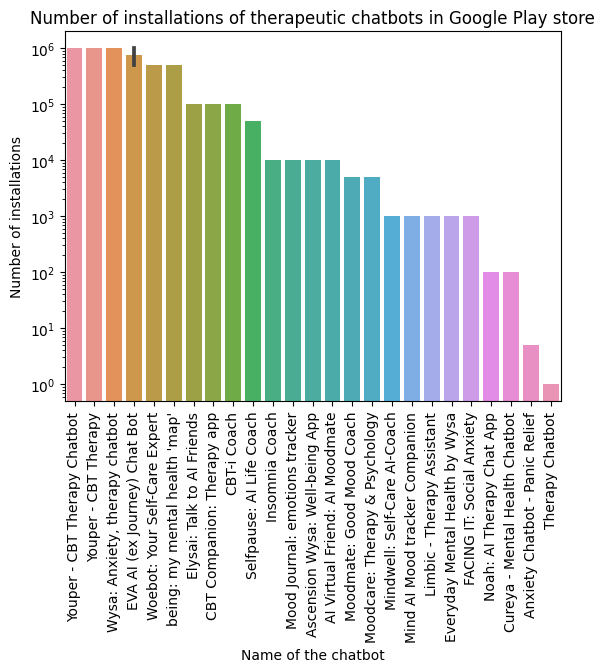

In [69]:
seaborn.barplot(data=chatbot_df[['title','installs']].sort_values(by='installs',ascending=False),x='title',y='installs',log=True)
plt.xticks(rotation=90)
plt.title(label='Number of installations of therapeutic chatbots in Google Play store')
plt.ylabel('Number of installations')
plt.xlabel('Name of the chatbot')
plt.show()


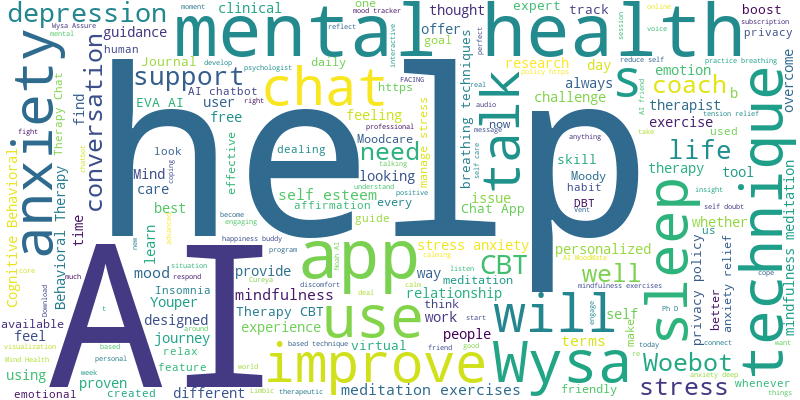

In [5]:
from wordcloud import WordCloud
WordCloud(background_color='white',width=800, height=400).generate(''.join(chatbot_df.description.values)).to_image()

# Unused section for reviews' scraping

In [11]:
#scraping reviews for therapeutic chatbots
from google_play_scraper import Sort, reviews_all
reviews = []
for app_id in df_bot[df_bot['category'].apply(lambda x: True if 'therapeutic chatbot' in x else False)]['appId']:
    reviews.append(reviews_all(
        app_id,
        sleep_milliseconds=0, # defaults to 0
        lang='en', # defaults to 'en'
        country='us', # defaults to 'us'
        sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    ))

In [11]:
seaborn.barplot(data=cai_df[['title_x','no_reviews']].sort_values(by='no_reviews'),x='title_x',y='no_reviews',log=True)
#seaborn.barplot(data=cai_df[['title_x','installs']],x='title_x',y='installs',log=True)
plt.xticks(rotation=90)
plt.title(label='Number of reviews of the therapeutic chatbots')
plt.show()


KeyboardInterrupt: 

In [39]:
Wysa_reviews = pd.DataFrame(reviews[1])
Youper_reviews = pd.DataFrame(reviews[5])
Eva_reviews = pd.DataFrame(reviews[9])


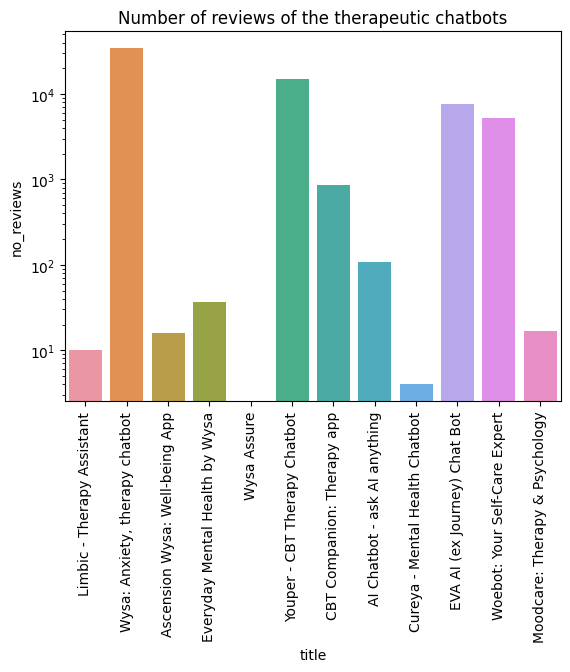

In [53]:
import seaborn
seaborn.barplot(data=cai_df[['title','no_reviews']],x='title',y='no_reviews',log=True)
plt.xticks(rotation=90)
plt.title(label='Number of reviews of the therapeutic chatbots')
plt.show()


# Latent Dirichlet Analysis
LDA is a method of automatic extraction of main topics in the documents. Unfortunately, the topics are often not easily interpretable

In [5]:
### Inspired by https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
from tqdm import tqdm
import nltk
from spacy import Language

nltk.download('stopwords')
import re
import itertools
import numpy as np
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
#from spacy_langdetect import LanguageDetector



nlp = spacy.load("en_core_web_sm")


# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

stop_words = stopwords.words('english')
words_to_remove = ['app', 'application', 'user', 'mental_health', 'mental','help','use','way','people']

def text_to_words(texts):
    for text in texts:
        words = gensim.utils.simple_preprocess(str(text), deacc=True)  # deacc=True removes punctuations
        if words:
            yield words


def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if (word not in stop_words)&(word not in words_to_remove)] for doc in
            tqdm(texts, desc="Remove stopwords")]


def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for doc in tqdm(texts, desc='Lemmatize'):
        doc = nlp(" ".join(doc))

        # Leave only nouns, adjectives, verbs and adverbs
        # Leave only sentences in English
        texts_out.append([token.lemma_ for sent in doc.sents
                          for token in sent
                          if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ppaul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#freq = topic_model.get_topic_info()
per_paragraph=False
first=100
num_topics=10
lda_chunksize=100
save_model=False

In [9]:
data  = chatbot_df.description.values.tolist()

data_words = list(text_to_words(data))

bigram = gensim.models.Phrases(data_words, min_count=1, threshold=1)
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in tqdm(texts, desc='Make bigrams')]

# trigram = gensim.models.Phrases(bigram[data_words], threshold=1)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

# def make_trigrams(texts):
#   return [trigram_mod[bigram_mod[doc]] for doc in texts]

# print(trigram_mod[bigram_mod[data_words[0]]])

data_words_nostops = remove_stopwords(data_words)

data_words_bigrams = make_bigrams(data_words_nostops)

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

id2word = corpora.Dictionary([x for x in tqdm(data_lemmatized, desc='Create Dictionary')])

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in tqdm(texts, desc='Create corpus')]
print(sorted([(freq, id2word[id]) for id, freq in corpus[0]], reverse=True)[:20])

Create corpus: 100%|██████████| 26/26 [00:00<00:00, 2460.22it/s]

[(9, 'wysa'), (4, 'technique'), (4, 'talk'), (4, 'improve'), (3, 'meditation'), (3, 'exercise'), (3, 'depression'), (3, 'deal'), (2, 'yoga'), (2, 'tool'), (2, 'thought'), (2, 'therapy_base'), (2, 'support'), (2, 'self_esteem'), (2, 'mindfulness_meditation'), (2, 'mindfulness'), (2, 'loss'), (2, 'look'), (2, 'health'), (2, 'happiness_buddy')]


In [10]:


lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=lda_chunksize,
                                            passes=40,
                                            alpha='auto',
                                            per_word_topics=True)
if save_model:
    lda_model.save(f"../../models/chatbots_lda_model-{first}_num-topics-{num_topics}.pkl")
pprint(lda_model.print_topics())
print('\nPerplexity: ', lda_model.log_perplexity(
    corpus))  # a measure of how good the model is. lower the better. SF: Really? Not higher the better?

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)





[(0,
  '0.023*"issue" + 0.016*"discomfort" + 0.014*"ascension_wysa" + '
  '0.010*"health" + 0.009*"feeling" + 0.009*"feel" + 0.009*"therapist" + '
  '0.008*"mindfulness" + 0.008*"tool" + 0.007*"therapy"'),
 (1,
  '0.016*"chat" + 0.015*"ai_moodmate" + 0.013*"look" + 0.013*"need" + '
  '0.011*"talk" + 0.011*"support" + 0.011*"well" + 0.011*"provide" + '
  '0.009*"conversation" + 0.009*"engage"'),
 (2,
  '0.014*"affirmation" + 0.013*"sleep" + 0.010*"health" + 0.010*"track" + '
  '0.010*"good" + 0.009*"coach" + 0.009*"selfpause" + 0.009*"overcome" + '
  '0.007*"make" + 0.007*"moodcare"'),
 (3,
  '0.017*"term" + 0.015*"learn" + 0.013*"anxiety" + 0.013*"read" + '
  '0.010*"face" + 0.010*"self" + 0.010*"overcome" + 0.010*"skill" + '
  '0.009*"privacy_policy" + 0.008*"time"'),
 (4,
  '0.027*"wysa" + 0.016*"technique" + 0.014*"talk" + 0.013*"health" + '
  '0.012*"improve" + 0.012*"depression" + 0.011*"deal" + 0.011*"support" + '
  '0.009*"chat" + 0.009*"cope"'),
 (5,
  '0.020*"chat" + 0.014*"ge

In [11]:
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds='mmds')

c:\Users\ppaul\OneDrive\Dokumenty\kogni\gstore_scrapper\topics_chatbot\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [12]:
pyLDAvis.save_html(data=vis, fileobj=f"chatbots_vis-{lda_chunksize}_num-topics-{num_topics}_del.html")

# Bertopic
Bertopic is 

In [18]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# we add this to remove stopwords
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

model = BERTopic(
    vectorizer_model=vectorizer_model,
    language='english', calculate_probabilities=True,
    verbose=True
)
topics, probs = model.fit_transform(df.description.values)

ModuleNotFoundError: No module named 'bertopic'

In [ ]:
from sentence_transformers import SentenceTransformer, util
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
import numpy as np
# Step 1 - Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Step 2 - Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')

# Step 3 - Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

# Step 4 - Tokenize topics
vectorizer_model = CountVectorizer(stop_words="english")

# Step 5 - Create topic representation
ctfidf_model = ClassTfidfTransformer()

# All steps together
topic_model = BERTopic(
  embedding_model=embedding_model,    # Step 1 - Extract embeddings
  umap_model=umap_model,              # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,        # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,  # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,          # Step 5 - Extract topic words
  #diversity=0.5,                      # Diversify topic words
  calculate_probabilities=True,        
  verbose=True
)

topics, probs = topic_model.fit_transform(df.description.values)
topic_model.get_topic_info()

Batches: 100%|██████████| 7/7 [00:29<00:00,  4.20s/it]
2023-05-06 02:14:29,702 - BERTopic - Transformed documents to Embeddings
2023-05-06 02:14:40,920 - BERTopic - Reduced dimensionality
2023-05-06 02:14:41,021 - BERTopic - Clustered reduced embeddings


,Topic,Count,Name
0,-1,8,-1_wysa_techniques_mindfulness_meditation
1,0,84,0_health_mental_help_self
2,1,51,1_self_mood_health_tracker
3,2,30,2_therapist_therapists_therapy_licensed
4,3,27,3_ai_chat_gpt_chatbot


In [35]:
freq

,Topic,Count,Name
0,-1,8,-1_wysa_techniques_mindfulness_meditation
1,0,84,0_health_mental_help_self
2,1,51,1_self_mood_health_tracker
3,2,30,2_therapist_therapists_therapy_licensed
4,3,27,3_ai_chat_gpt_chatbot


#LDA

In [19]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF, MiniBatchNMF, LatentDirichletAllocation




In [20]:
#df.description.values
def LDA(descriptions,n_features = 1000):
    # Use tf (raw term count) features for LDA.
    print("Extracting tf features for LDA...")
    
    tf_vectorizer = CountVectorizer(
        max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
    )
    t0 = time()
    tf = tf_vectorizer.fit_transform(descriptions)
    print("done in %0.3fs." % (time() - t0))

    lda = LatentDirichletAllocation(
        n_components=10,
        max_iter=5,
        learning_method="online",
        learning_offset=50.0,
        random_state=0,
    )
    t0 = time()
    lda.fit(tf)
    print("done in %0.3fs." % (time() - t0))

    tf_feature_names = tf_vectorizer.get_feature_names_out()
    print('Ploting')
    n_top_words = 5
    plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")


In [21]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

top lista najbardziej popularnych słów wgl i w dokumentach na lematach
hanndcraft na co nie patrzeć
bigramy do lda 
lematyzować

<Axes: ylabel='Frequency'>

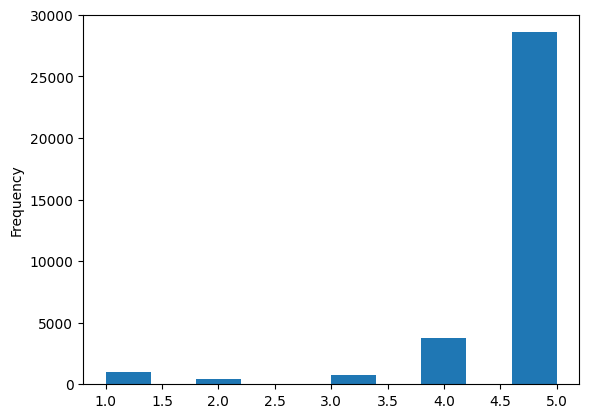

In [ ]:
Eva_reviews.score.plot(kind='hist')

In [22]:
df.columns

Index(['appId', 'icon', 'screenshots', 'title', 'score', 'genre', 'price',
       'free', 'currency', 'video', 'videoImage', 'description',
       'descriptionHTML', 'developer', 'installs', 'keyword'],
      dtype='object')

Extracting tf features for LDA...
done in 0.587s.
done in 3.028s.
Ploting


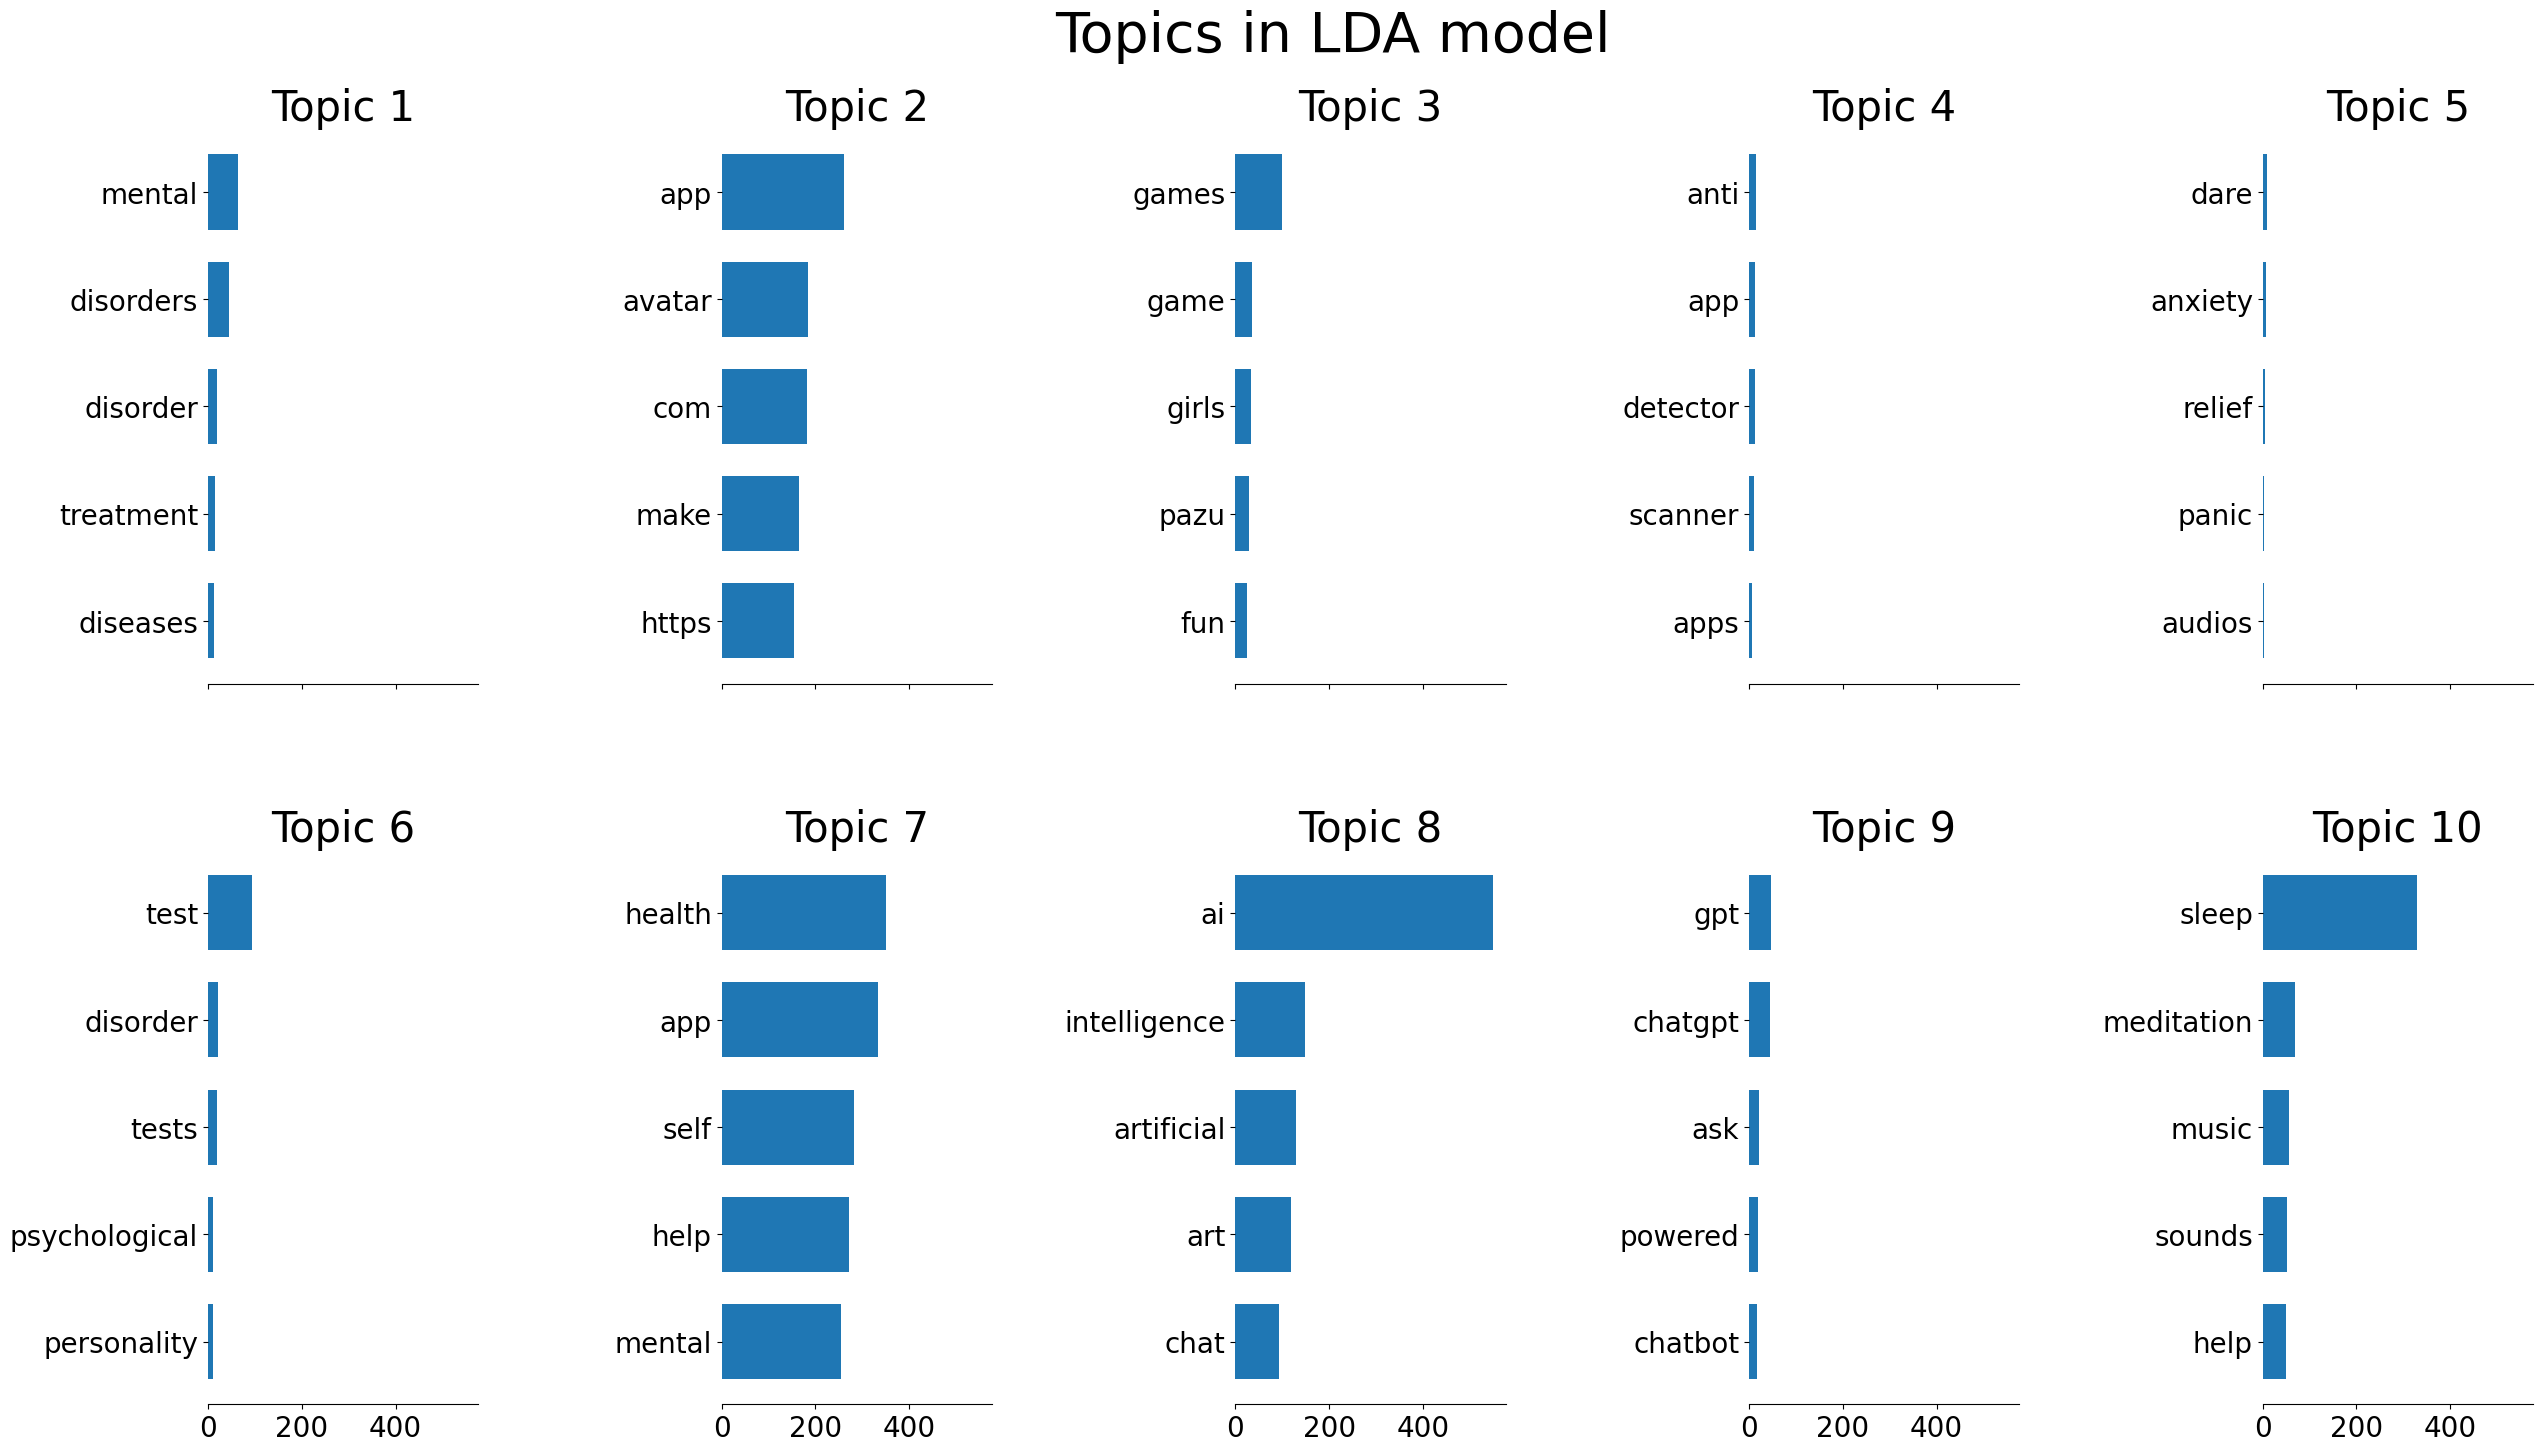

In [23]:
LDA(df.description.values)

Extracting tf features for LDA...
done in 0.541s.
done in 16.828s.
Ploting


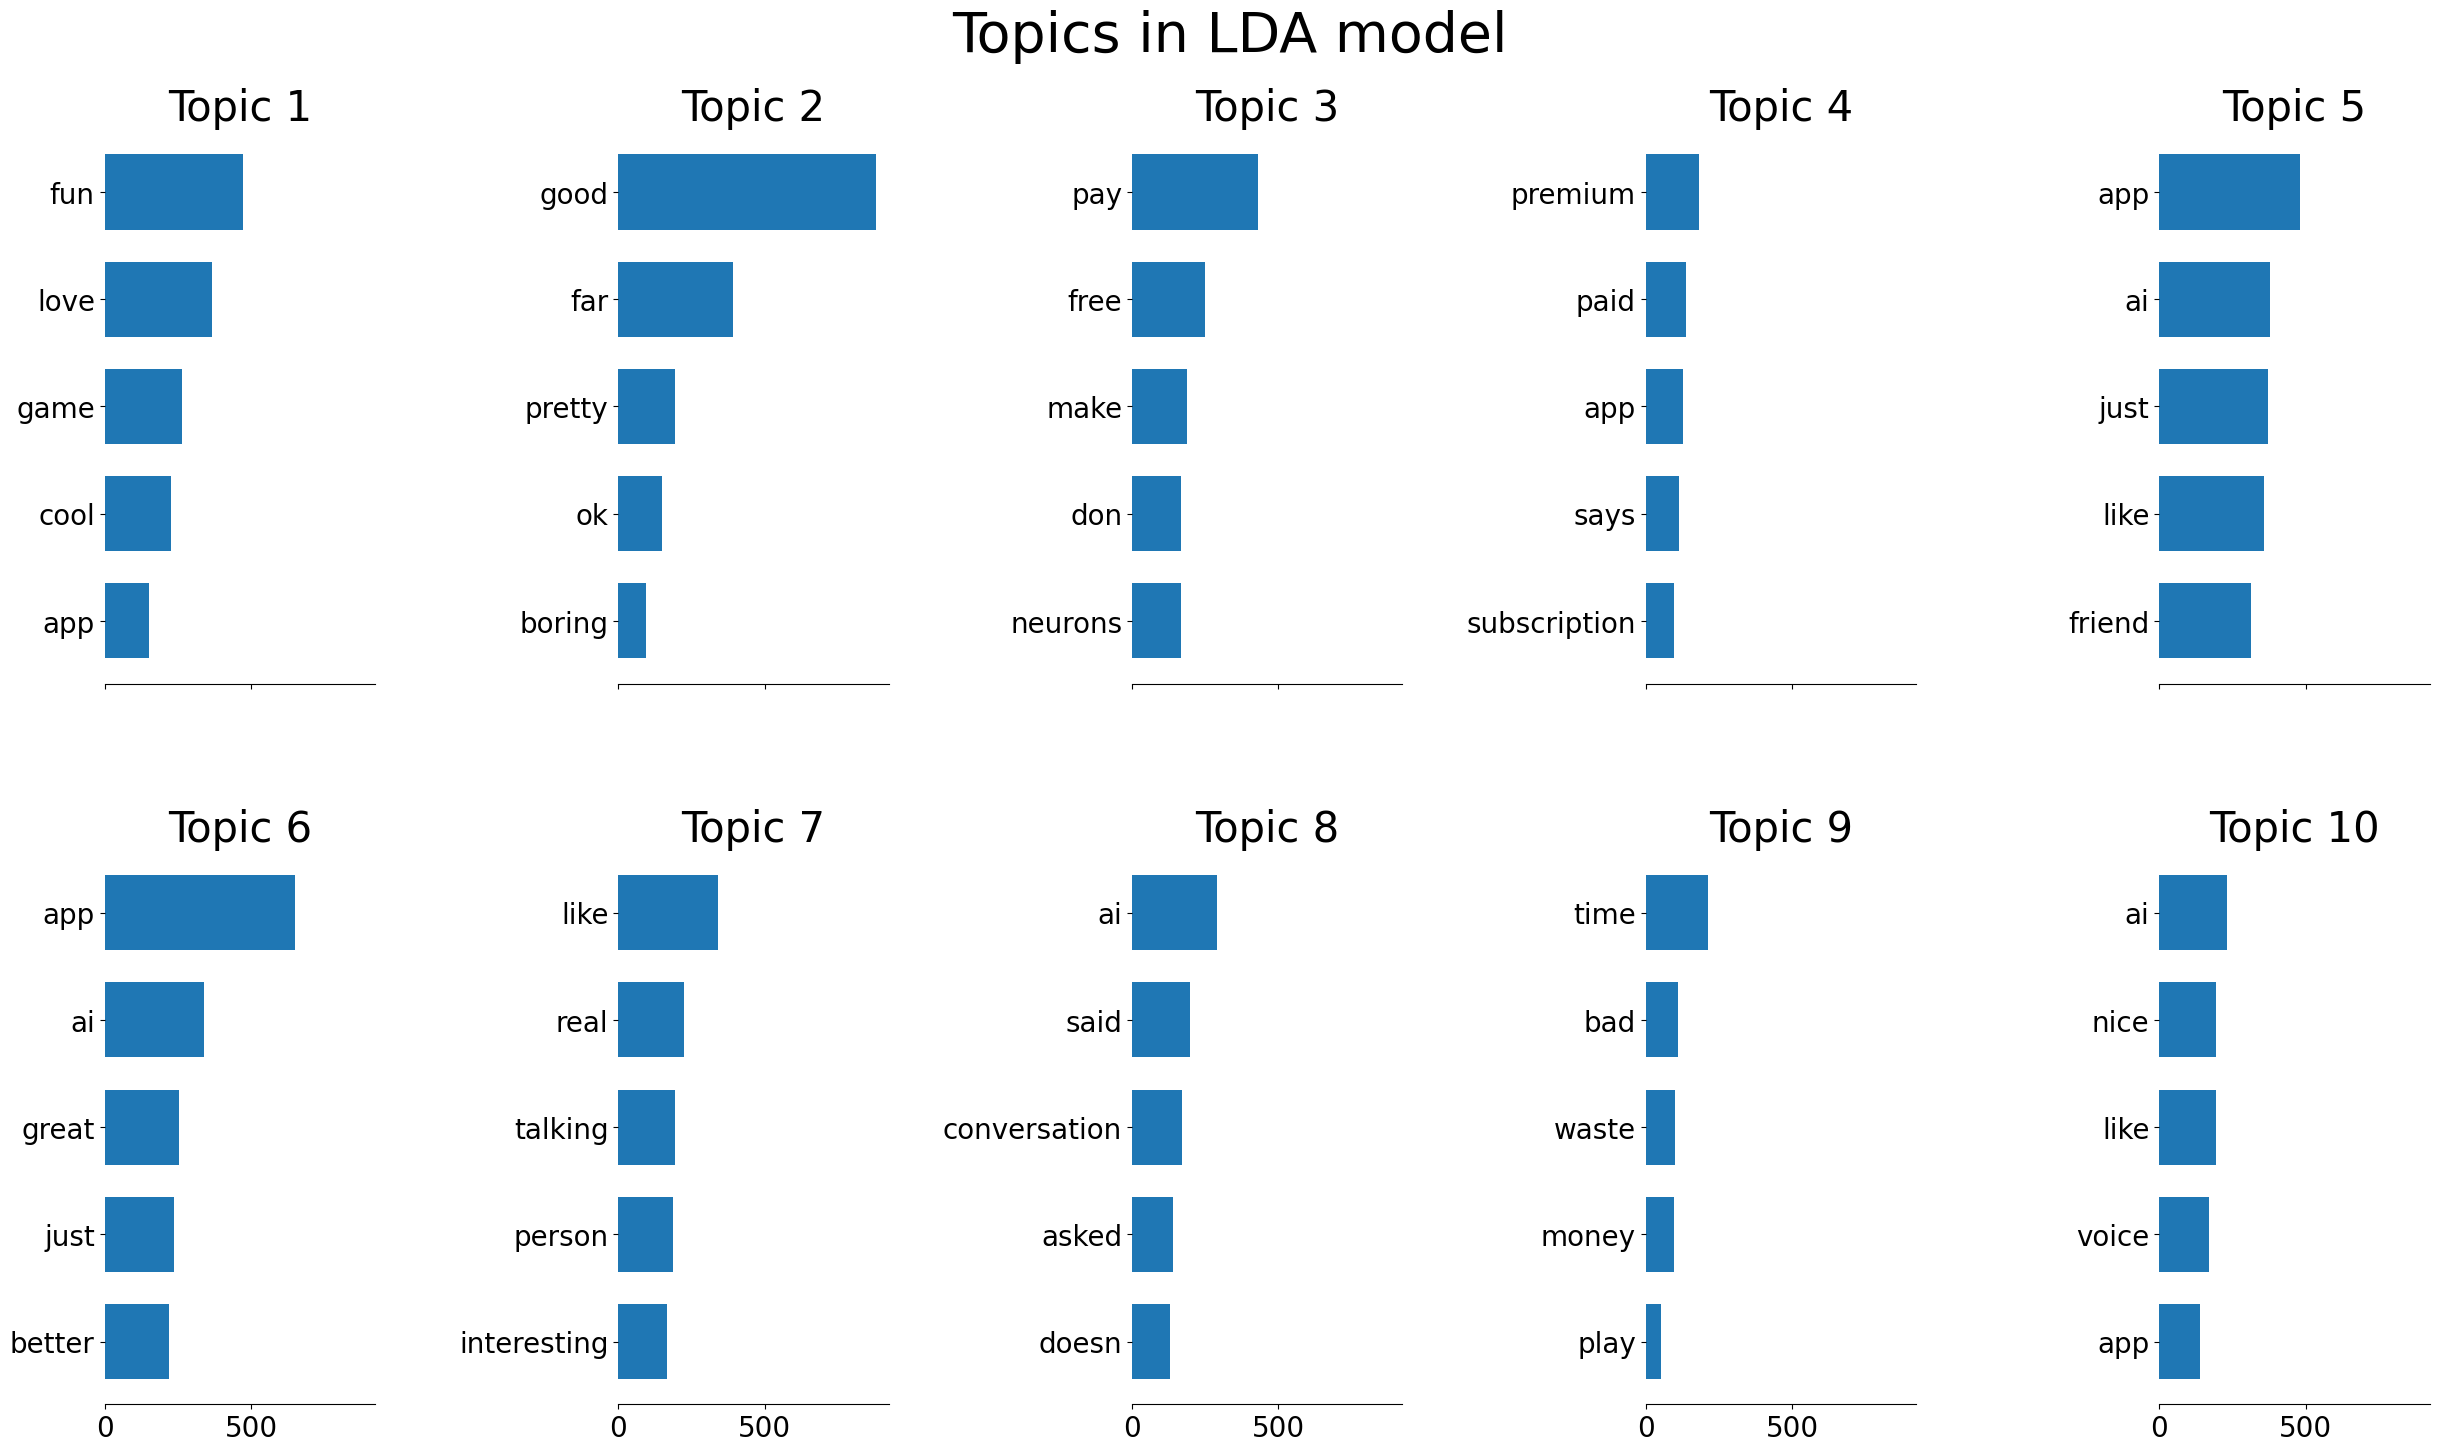

Extracting tf features for LDA...


TypeError: 'NoneType' object is not iterable

In [48]:
LDA(LDA(Eva_reviews.content.values))

Extracting tf features for LDA...
done in 1.556s.
done in 79.192s.
Ploting


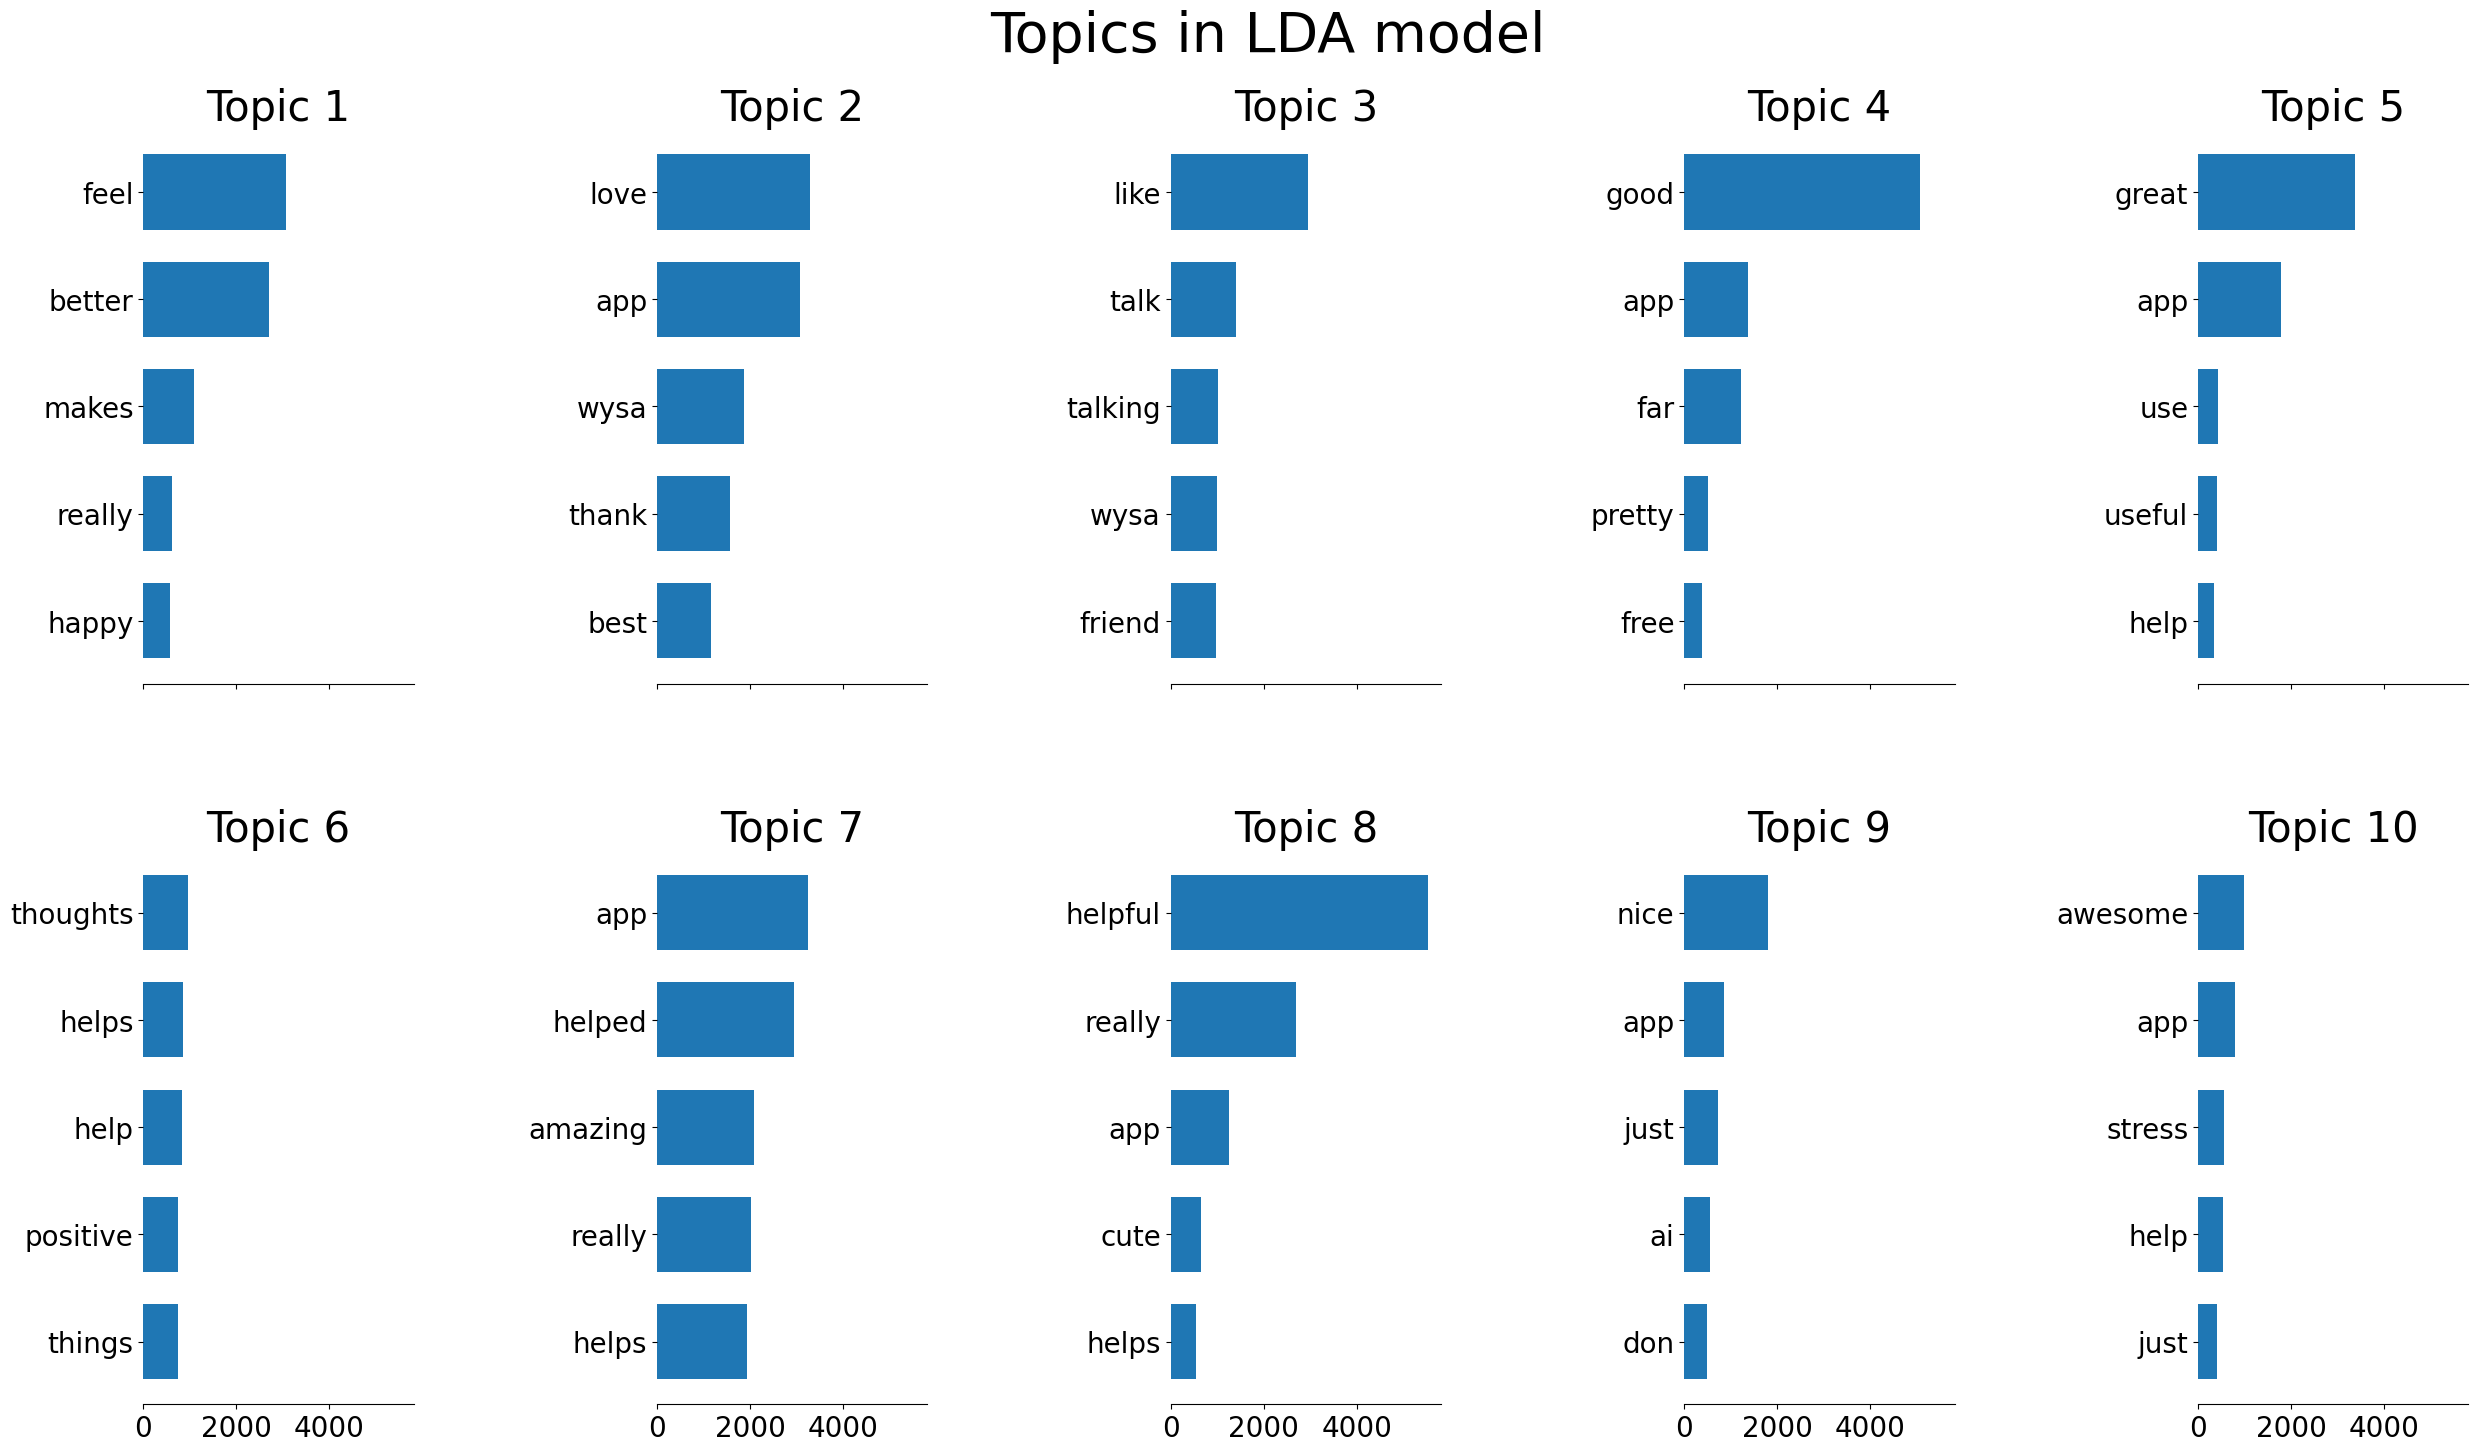

In [40]:
LDA(Wysa_reviews.content.values)

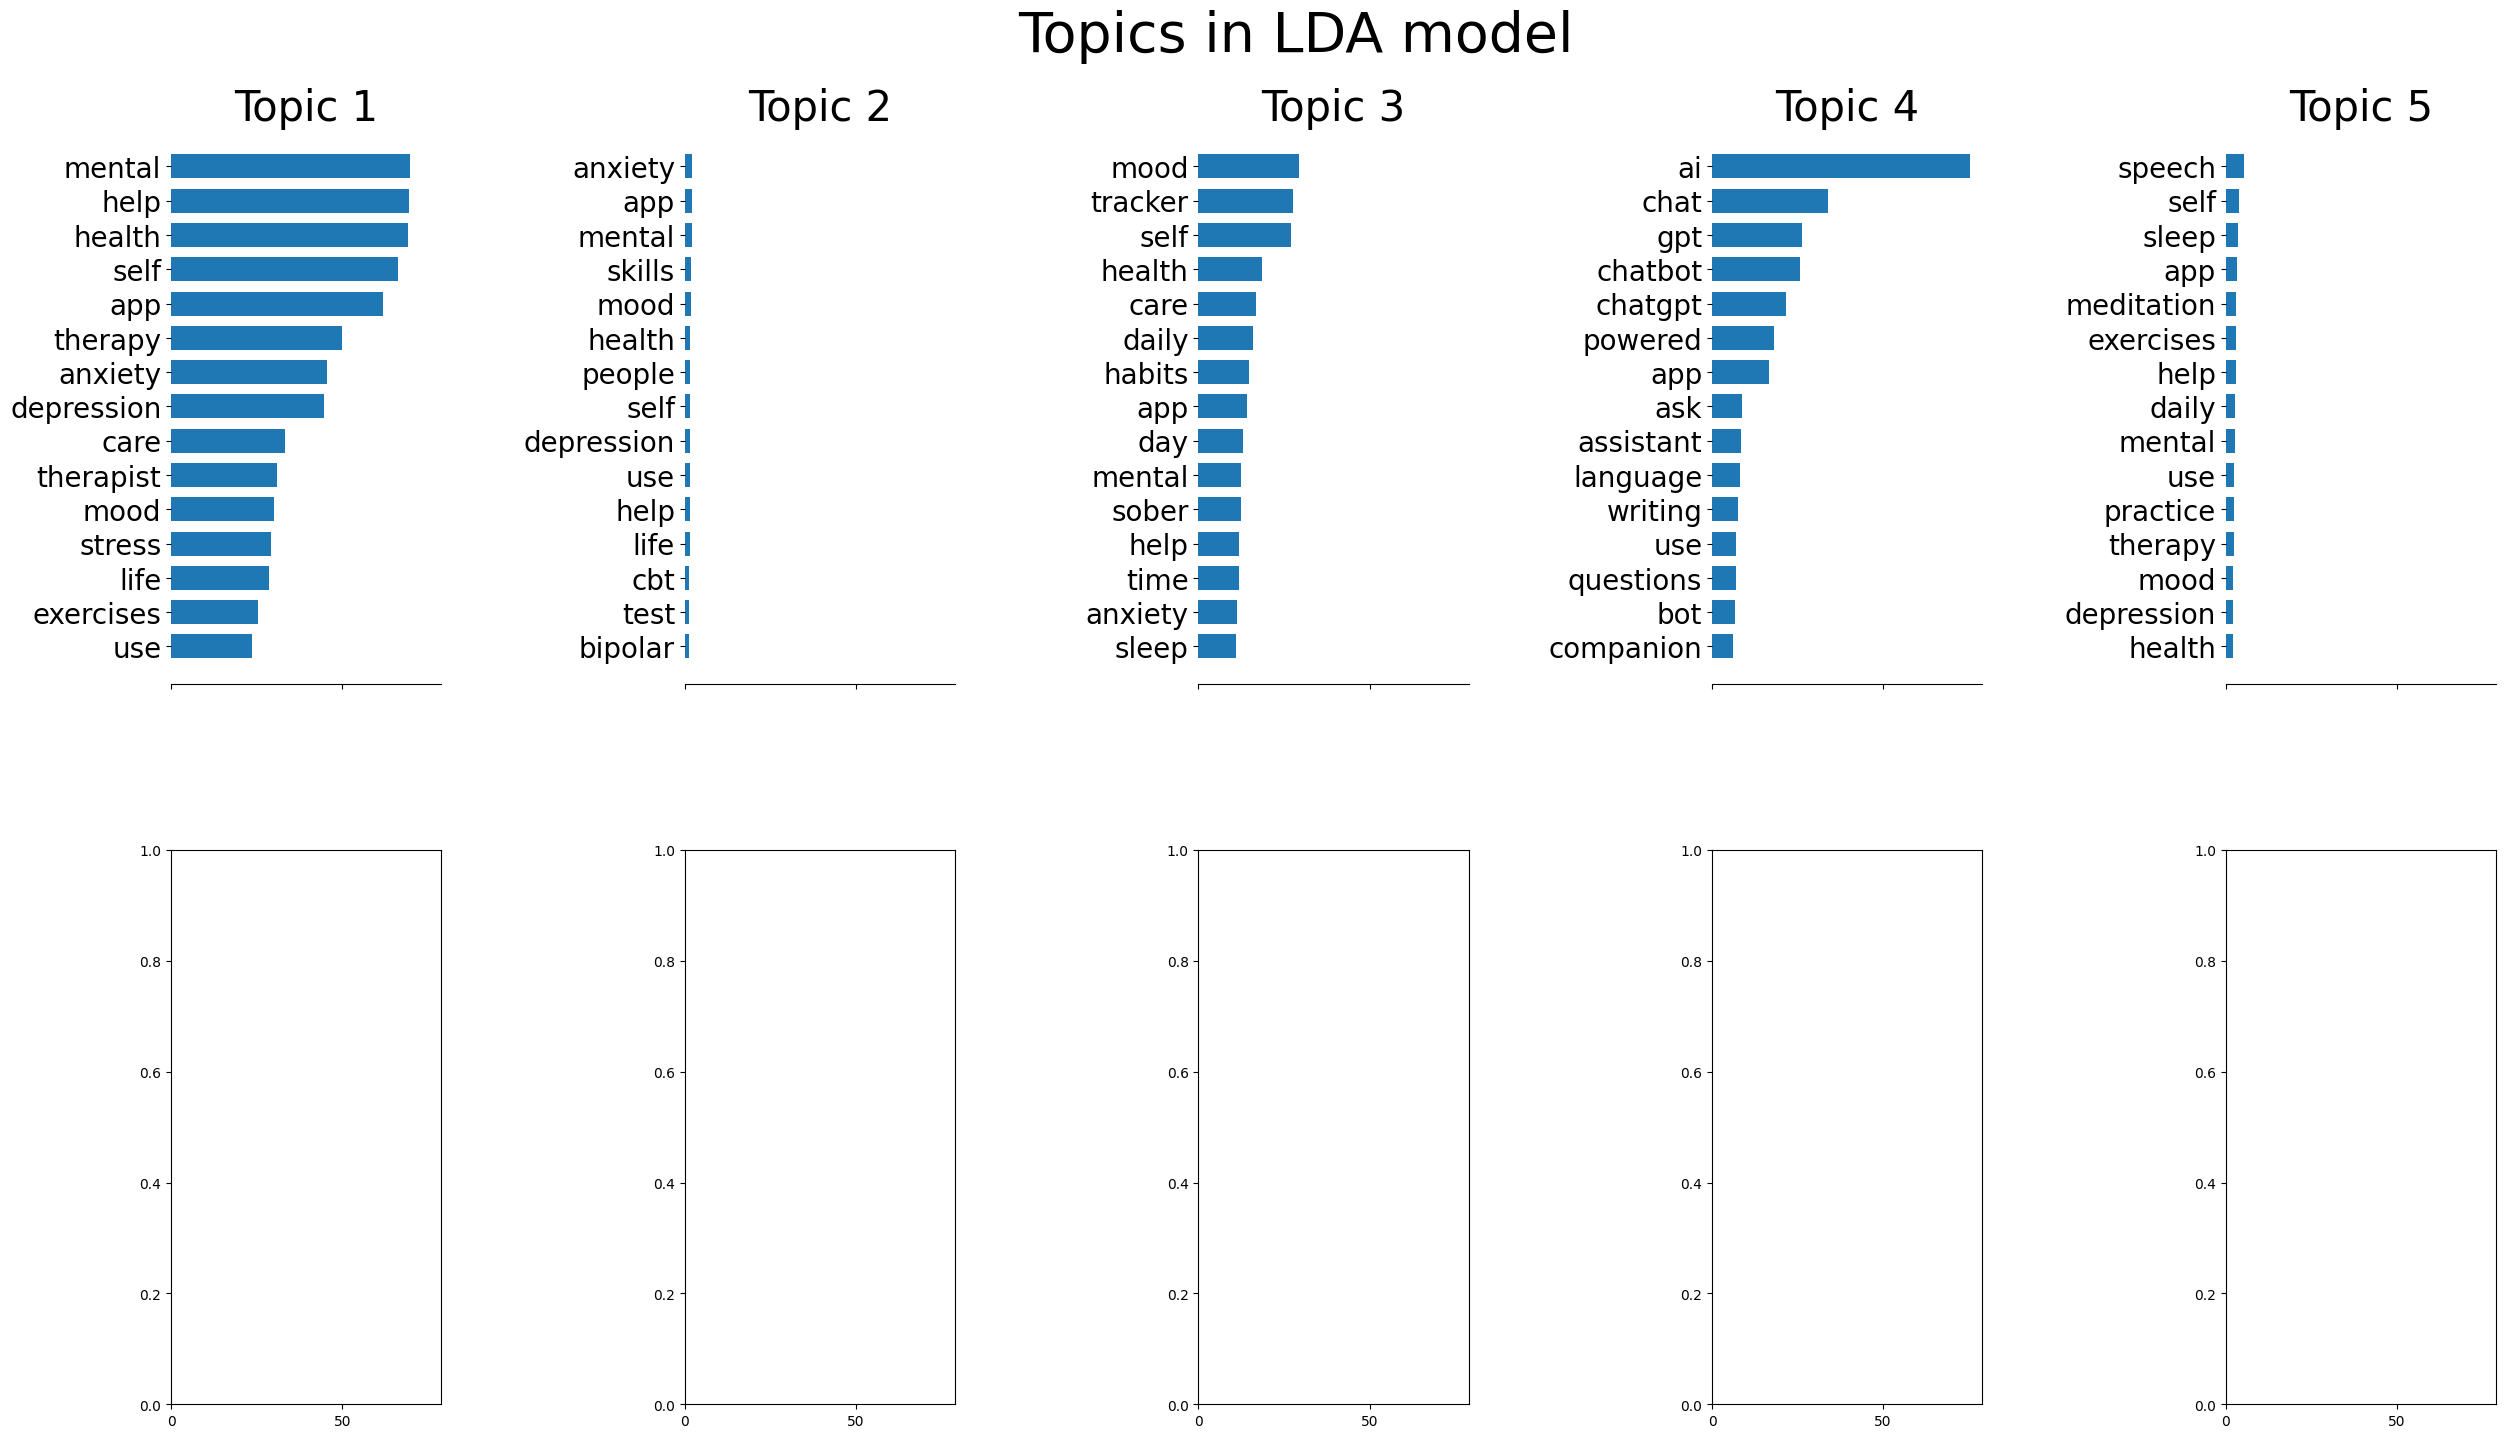

In [10]:
n_top_words = 15
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

#Research keywords

<Axes: title={'center': 'Number of research keywords in description'}, ylabel='Frequency'>

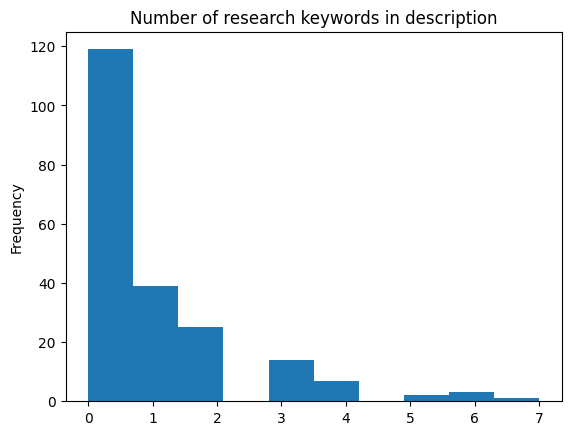

In [28]:
keywords = ['research','evidence','evidence-based', 'study', 'studies', 'researchers', 'researcher','science','scientific','science-based','paper','proved','research-backed']

df.description = df.description.str.lower()
#df.description = df.description.str.replace(r'[^\w\s]+', '')

df.description.apply(lambda x: sum([True if word in x else False for word in keywords])).plot(kind='hist',title='Number of research keywords in description')

In [24]:
from lda import guidedlda as glda

In [25]:

seeds = [['research','evidence','evidence-based', 'study', 'studies', 'researchers', 'researcher','science','scientific','science-based','paper','proved','research-backed'],
         ['chatbot','chat','ai','gpt'],
         ['meditation','mindfullness'],
         ['cbt','cognitive-behavioral','cognitive-behavioral therapy'],
         #['depression'],
         #['anxiety'],
         #['live','patient'],
         #['medication','doctor'],
         ['sleep','insomnia','sleep hygiene','sleeping habits']]

In [26]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
X = mlb.fit_transform(texts)
word2id = dict((v, idx) for idx, v in enumerate(mlb.classes_))

In [27]:
model = glda.GuidedLDA(n_topics=30, n_iter=100, random_state=7, refresh=20)

seed_topics = {}
for t_id, st in enumerate(seeds):
    for word in st:
        if word in mlb.classes_:
            seed_topics[word2id[word]] = t_id
        else:
            st.remove(word)
model.fit(X, seed_topics=seed_topics, seed_confidence=0.45)

INFO:lda:n_documents: 422
INFO:lda:vocab_size: 10468
INFO:lda:n_words: 48113
INFO:lda:n_topics: 30
INFO:lda:n_iter: 100


INFO:lda:<0> log likelihood: -690884
INFO:lda:<20> log likelihood: -474478
INFO:lda:<40> log likelihood: -462815
INFO:lda:<60> log likelihood: -457909
INFO:lda:<80> log likelihood: -454063
INFO:lda:<99> log likelihood: -452223


In [28]:
n_top_words = 7
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(mlb.classes_)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: mind feature focus sleep day make set
Topic 1: experience engage need conversation fun provide look
Topic 2: share fun friend make many avatar add
Topic 3: phone keep device see send message require
Topic 4: sound sleep_sound sleep wake nature_sound world improve_sleep
Topic 5: even watch social_media explore think word user
Topic 6: content tablet good free offline right listen
Topic 7: many develop experience datum tool personal issue
Topic 8: hero skill fight level time com attack
Topic 9: com always communicate community note example language
Topic 10: video know feature find access service device
Topic 11: end subscription charge account renew free_trial purchase
Topic 12: love story music live inspire get download
Topic 13: world adventure game new find join explore
Topic 14: health activity understand work personalize see care
Topic 15: make need free see enjoy new build
Topic 16: get create available go use add view
Topic 17: chatbot answer text want use question respo

In [36]:
science_claim = df[df.description.apply(lambda x: sum([True if word in x else False for word in keywords]))!=0]

#wordcloud

c:\Users\ppaul\OneDrive\Dokumenty\kogni\gstore_scrapper\topics_chatbot\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


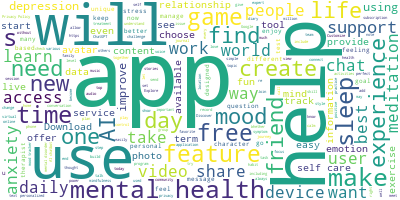

In [29]:
from wordcloud import WordCloud
WordCloud(background_color='white').generate(''.join(df.description.values)).to_image()

In [41]:
len(df[df.description.apply(lambda x: any([True if word in x else False for word in ['chatbot','bot']]))])

53

<Axes: ylabel='Frequency'>

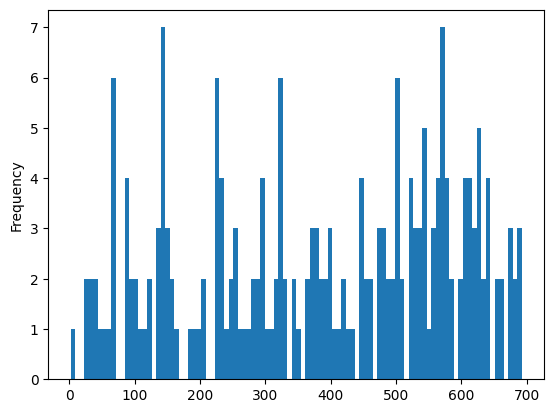

In [38]:
#length analysis
df.description.apply(lambda x: len(x.split())).plot(kind='hist', bins=100)

In [ ]:
from itunes_app_scraper.scraper import AppStoreScraper

scraper = AppStoreScraper()
results = scraper.get_app_ids_for_query("fortnite")

#google scholar scraper

In [35]:
from scrape_google_scholar import *

Starting DataKund...


In [36]:
response = google.scholar_scraper(search='Wysa')

Progress:  30%|███       | 60.0/200 [00:16<00:38,  3.63it/s]

In [42]:
papers = {}
for title in science_claim.title.values:
    papers[title] = google.scholar_scraper(search=title)

Progress:  86%|████████▌ | 171.8/200 [00:26<00:04,  6.00it/s]
Progress: 201.8it [00:38,  4.10it/s]                         
Progress: 221.8it [00:42,  4.27it/s]
Progress: 285.4it [00:50,  5.61it/s]

Progress: 315.4it [00:54,  5.99it/s]




Progress: 335.4it [00:58,  5.76it/s]
Progress: 393.79999999999995it [01:12,  4.89it/s]








Progress: 423.79999999999995it [01:18,  4.91it/s]





Progress: 443.79999999999995it [01:22,  4.92it/s]









Progress: 473.79999999999995it [01:34,  3.82it/s]











Progress: 493.79999999999995it [01:38,  4.02it/s]







Progress: 555.5999999999999it [01:46,  5.24it/s] 























Progress: 585.5999999999999it [01:52,  5.17it/s]














Progress: 605.5999999999999it [01:57,  5.11it/s]







Progress: 633.8it [01:46,  5.93it/s]










Progress: 635.5999999999999it [02:09,  3.90it/s]

















Progress: 655.5999999999999it [02:13,  4.09it/s]



























Progress: 685.5999999999999it [02:25,  3.39it/s]





Jak wykrywać tytuł?
podzielić na kategorie: chatbot, terapia online, materiały. przeprowadzić na nowo - zbadac dla każdej kategorii. Przejrzeć własnoręcznie. 

<Axes: ylabel='Frequency'>

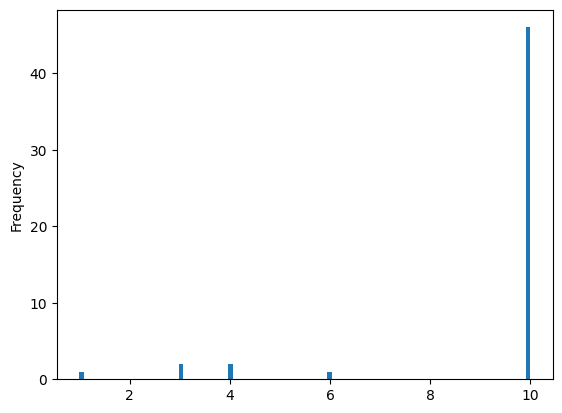

In [50]:
pd.DataFrame.from_dict(papers,orient='index').body.apply(lambda x: len(x)).plot(kind='hist', bins=100)

In [60]:
pd.options.display.max_rows = 4000

In [54]:
claim = pd.DataFrame.from_dict(papers,orient='index')
claim = claim[claim.body.apply(lambda x: len(x))==10][['body']]
claim = claim.reset_index()

In [62]:
claim.body.apply(lambda x: x[0]['Title']).reset_index()

,index,body
0,"Wysa: Anxiety, therapy chatbot",Evaluating the Therapeutic Alliance With a Fre...
1,Talkspace Counseling & Therapy,Talkspace Review [2022]: Online Therapy App Co...
2,Woebot: Your Self-Care Expert,A review of mobile chatbot apps for anxiety an...
3,Youper - CBT Therapy,Acceptability and effectiveness of artificial ...
4,Online Therapy: Meet with Your,Nobody has openingsʼ: mental health providers ...
5,‎MyPossibleSelf: Mental Health,Brief digital interventions to support the psy...
6,DBT Coach : Guided Therapy,The DBT Coach mobile application as an adjunct...
7,being: my mental health 'map',Culture and the social construction of gender:...
8,Clarity - CBT Thought Diary,Cognitive–behavioural therapies for children a...
9,MindShift CBT - Anxiety Relief,Brief App-Based Cognitive Behavioral Therapy f...


#TF-IDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['description'].values)

In [31]:
df['keyword'] = df['keyword'].apply(lambda x: x.strip(',][').split(', '))

In [32]:
np.mean(np.corrcoef(X.todense()))

0.03230227541087407

In [65]:
for x in np.nditer(np.argpartition(np.squeeze(np.mean(X,axis=0)), -5)[0,-5:]):
    print(x)

4093
5435
628
7915
447


In [68]:
words_dict = {v: k for k, v in vectorizer.vocabulary_.items()}

print([words_dict[int(i)] for i in np.nditer(np.argpartition(np.squeeze(np.mean(X,axis=0)), -20)[0,-20:])])

['game', 'use', 'depression', 'life', 'time', 'https', 'chat', 'anxiety', 'care', 'com', 'help', 'new', 'free', 'mood', 'ai', 'health', 'app', 'self', 'mental', 'sleep']


In [29]:
import numpy as np

for keyword in set(df['keyword'].sum()):
    df[df['keyword'].apply(lambda x: True if keyword in x else False)].index
    keyword_X = df[df['keyword'].apply(lambda x: True if keyword in x else False)].index
    print(keyword, np.mean(np.corrcoef(X[keyword_X].todense())))
    print(np.shape(X[keyword_X]))
    print(words_dict[np.argmax(np.mean(X[keyword_X],axis=0))])

'therapy' 0.12009652089186948
(30, 5678)
therapy
'therapeutic chatbot' 0.19593008421780186
(30, 5678)
ai
'anxiety' 0.12563535949415652
(30, 5678)
anxiety
'addiction' 0.10954403608688892
(30, 5678)
addiction
'schizophrenia' 0.10360316267846591
(30, 5678)
schizophrenia
'therapy chatbot' 0.12286459829122916
(30, 5678)
ai
'substance abuse' 0.11886102898512443
(30, 5678)
sober
'depression' 0.10156771532677292
(30, 5678)
depression
'self-harm' 0.09763943905698272
(50, 5678)
self
'mental health' 0.11592728230308988
(30, 5678)
health
